In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
df_energy = pd.read_csv('dataset/energy_dataset.csv')
df_weather = pd.read_csv('dataset/weather_features.csv')

In [3]:
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True, infer_datetime_format=True)
df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)

In [4]:
df_weather.rename(columns={'dt_iso': 'time'}, inplace=True)

In [5]:
df_weather.head()

,time,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [6]:
df_energy_weather = pd.merge(df_energy, df_weather, on='time')

In [7]:
df_energy_weather.T

,0,1,2,3,4,5,6,7,8,9,...,178386,178387,178388,178389,178390,178391,178392,178393,178394,178395
time,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2015-01-01 00:00:00+00:00,2015-01-01 00:00:00+00:00,2015-01-01 00:00:00+00:00,2015-01-01 00:00:00+00:00,2015-01-01 00:00:00+00:00,...,2018-12-31 21:00:00+00:00,2018-12-31 21:00:00+00:00,2018-12-31 21:00:00+00:00,2018-12-31 21:00:00+00:00,2018-12-31 21:00:00+00:00,2018-12-31 22:00:00+00:00,2018-12-31 22:00:00+00:00,2018-12-31 22:00:00+00:00,2018-12-31 22:00:00+00:00,2018-12-31 22:00:00+00:00
generation biomass,447.0,447.0,447.0,447.0,447.0,449.0,449.0,449.0,449.0,449.0,...,293.0,293.0,293.0,293.0,293.0,290.0,290.0,290.0,290.0,290.0
generation fossil brown coal/lignite,329.0,329.0,329.0,329.0,329.0,328.0,328.0,328.0,328.0,328.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
generation fossil coal-derived gas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
generation fossil gas,4844.0,4844.0,4844.0,4844.0,4844.0,5196.0,5196.0,5196.0,5196.0,5196.0,...,6562.0,6562.0,6562.0,6562.0,6562.0,6926.0,6926.0,6926.0,6926.0,6926.0
generation fossil hard coal,4821.0,4821.0,4821.0,4821.0,4821.0,4755.0,4755.0,4755.0,4755.0,4755.0,...,2293.0,2293.0,2293.0,2293.0,2293.0,2166.0,2166.0,2166.0,2166.0,2166.0
generation fossil oil,162.0,162.0,162.0,162.0,162.0,158.0,158.0,158.0,158.0,158.0,...,163.0,163.0,163.0,163.0,163.0,163.0,163.0,163.0,163.0,163.0
generation fossil oil shale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
generation fossil peat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
generation geothermal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA, CLEANING DATA

In [8]:
# Create an instance of the LabelEncoder class
label_encoder = LabelEncoder()
# Encode the condition column using LabelEncoder
df_energy_weather['weather_main'] = label_encoder.fit_transform(df_energy_weather['weather_main'])
df_energy_weather

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,0,sky is clear,01n
1,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,309,0.0,0.0,0.0,0,800,0,sky is clear,01n
2,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0,226,0.0,0.0,0.0,0,800,0,sky is clear,01
3,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,7,58,0.0,0.0,0.0,0,800,0,sky is clear,01n
4,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,21,0.0,0.0,0.0,0,800,0,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,2,300,0.0,0.0,0.0,0,800,0,sky is clear,01n
178392,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,1,360,0.0,0.0,0.0,0,800,0,sky is clear,01n
178393,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,2,100,0.0,0.0,0.0,0,800,0,sky is clear,01n
178394,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,5,310,0.0,0.0,0.0,0,800,0,sky is clear,01n


/tmp/ipykernel_7478/273023936.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_energy = energy_corr.corr()


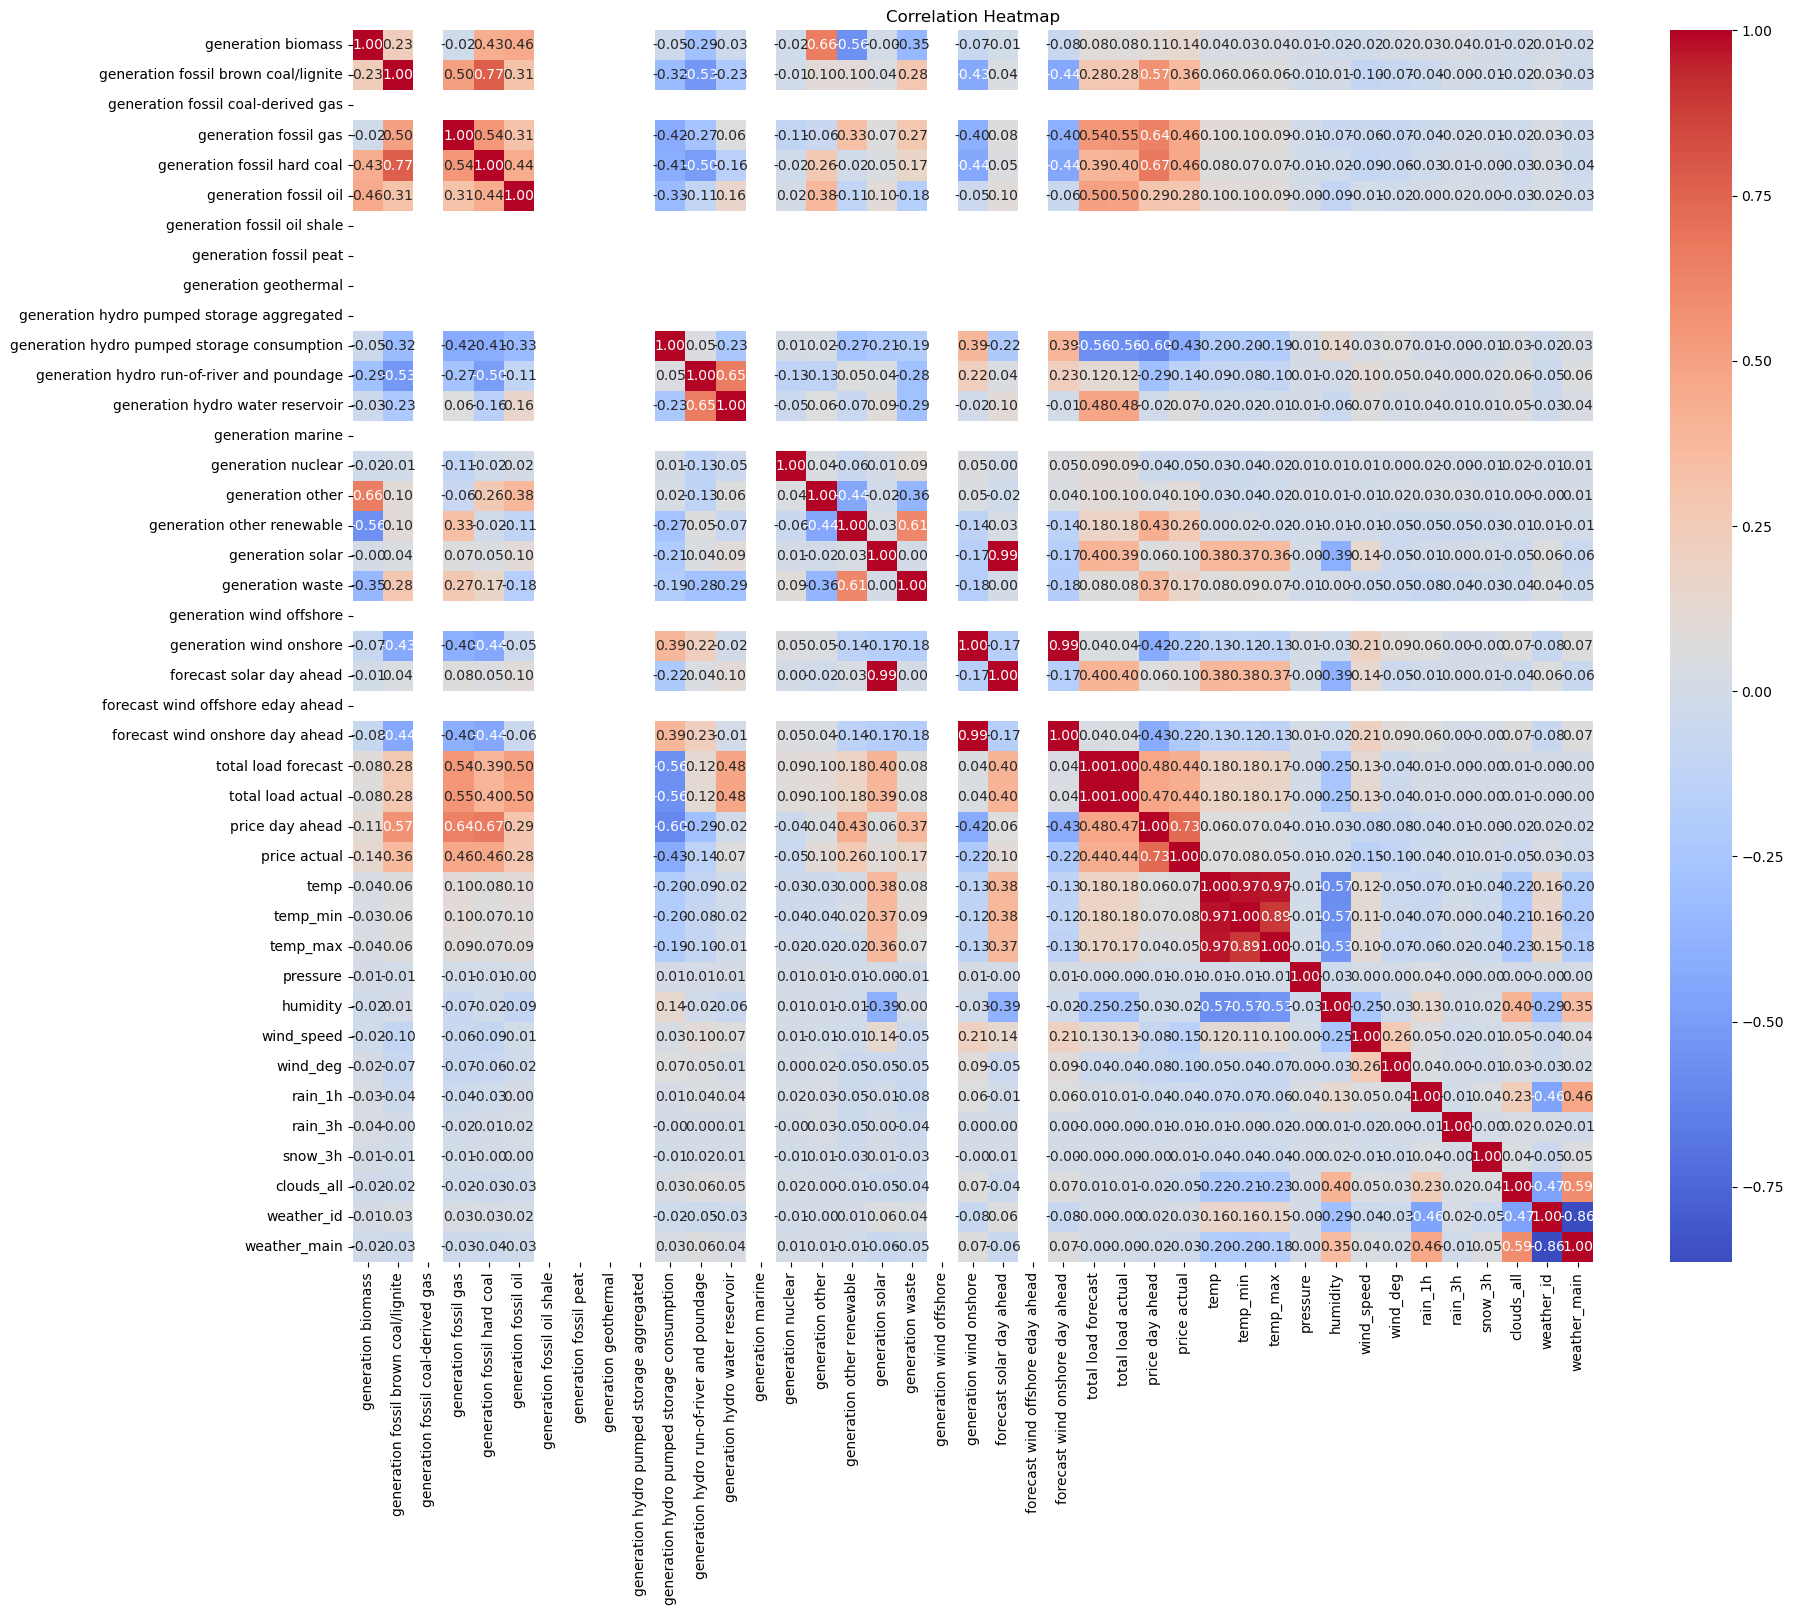

In [9]:
energy_corr = df_energy_weather.drop(columns=['time'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Dataset wragling

We decided to drop features that have not correlation with any of other features, so they useless for our analysis.
1. 'generation fossil coal-derived gas'
2. 'generation fossil oil shale', 
3. 'generation fossil peat', 
4. 'generation geothermal', 
6. 'generation marine', 
7. 'generation wind offshore', 

We decided to drop features that have a high correlation with other features, so they useless for our analysis:
- 'forecast wind onshore day ahead'
- 'forecast solar day ahead',
- 'total load forecast'

bc its overfitting : we can see it from correlation matrix that its 100% correlated to the total load actual 

We decided to drop some column because there is no collected data in them and they are variables that we cannot fill by ourself because they must be collected with a "tool": 
- generation hydro pumped storage aggregated 
- forecast wind offshore eday ahead

In [10]:
df_energy_weather=df_energy_weather.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 'generation marine', 
                            'generation wind offshore', 
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead', 'weather_description','weather_icon', 'temp_min', 'temp_max', 
                            'generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], 
                            axis=1)

In [18]:
df_energy_weather.head(10).T

,0,1,2,3,4,5,6,7,8,9
time,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2015-01-01 00:00:00+00:00,2015-01-01 00:00:00+00:00,2015-01-01 00:00:00+00:00,2015-01-01 00:00:00+00:00,2015-01-01 00:00:00+00:00
generation biomass,447.0,447.0,447.0,447.0,447.0,449.0,449.0,449.0,449.0,449.0
generation fossil brown coal/lignite,329.0,329.0,329.0,329.0,329.0,328.0,328.0,328.0,328.0,328.0
generation fossil gas,4844.0,4844.0,4844.0,4844.0,4844.0,5196.0,5196.0,5196.0,5196.0,5196.0
generation fossil hard coal,4821.0,4821.0,4821.0,4821.0,4821.0,4755.0,4755.0,4755.0,4755.0,4755.0
generation fossil oil,162.0,162.0,162.0,162.0,162.0,158.0,158.0,158.0,158.0,158.0
generation hydro pumped storage consumption,863.0,863.0,863.0,863.0,863.0,920.0,920.0,920.0,920.0,920.0
generation hydro run-of-river and poundage,1051.0,1051.0,1051.0,1051.0,1051.0,1009.0,1009.0,1009.0,1009.0,1009.0
generation hydro water reservoir,1899.0,1899.0,1899.0,1899.0,1899.0,1658.0,1658.0,1658.0,1658.0,1658.0
generation nuclear,7096.0,7096.0,7096.0,7096.0,7096.0,7096.0,7096.0,7096.0,7096.0,7096.0


/tmp/ipykernel_7478/273023936.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_energy = energy_corr.corr()


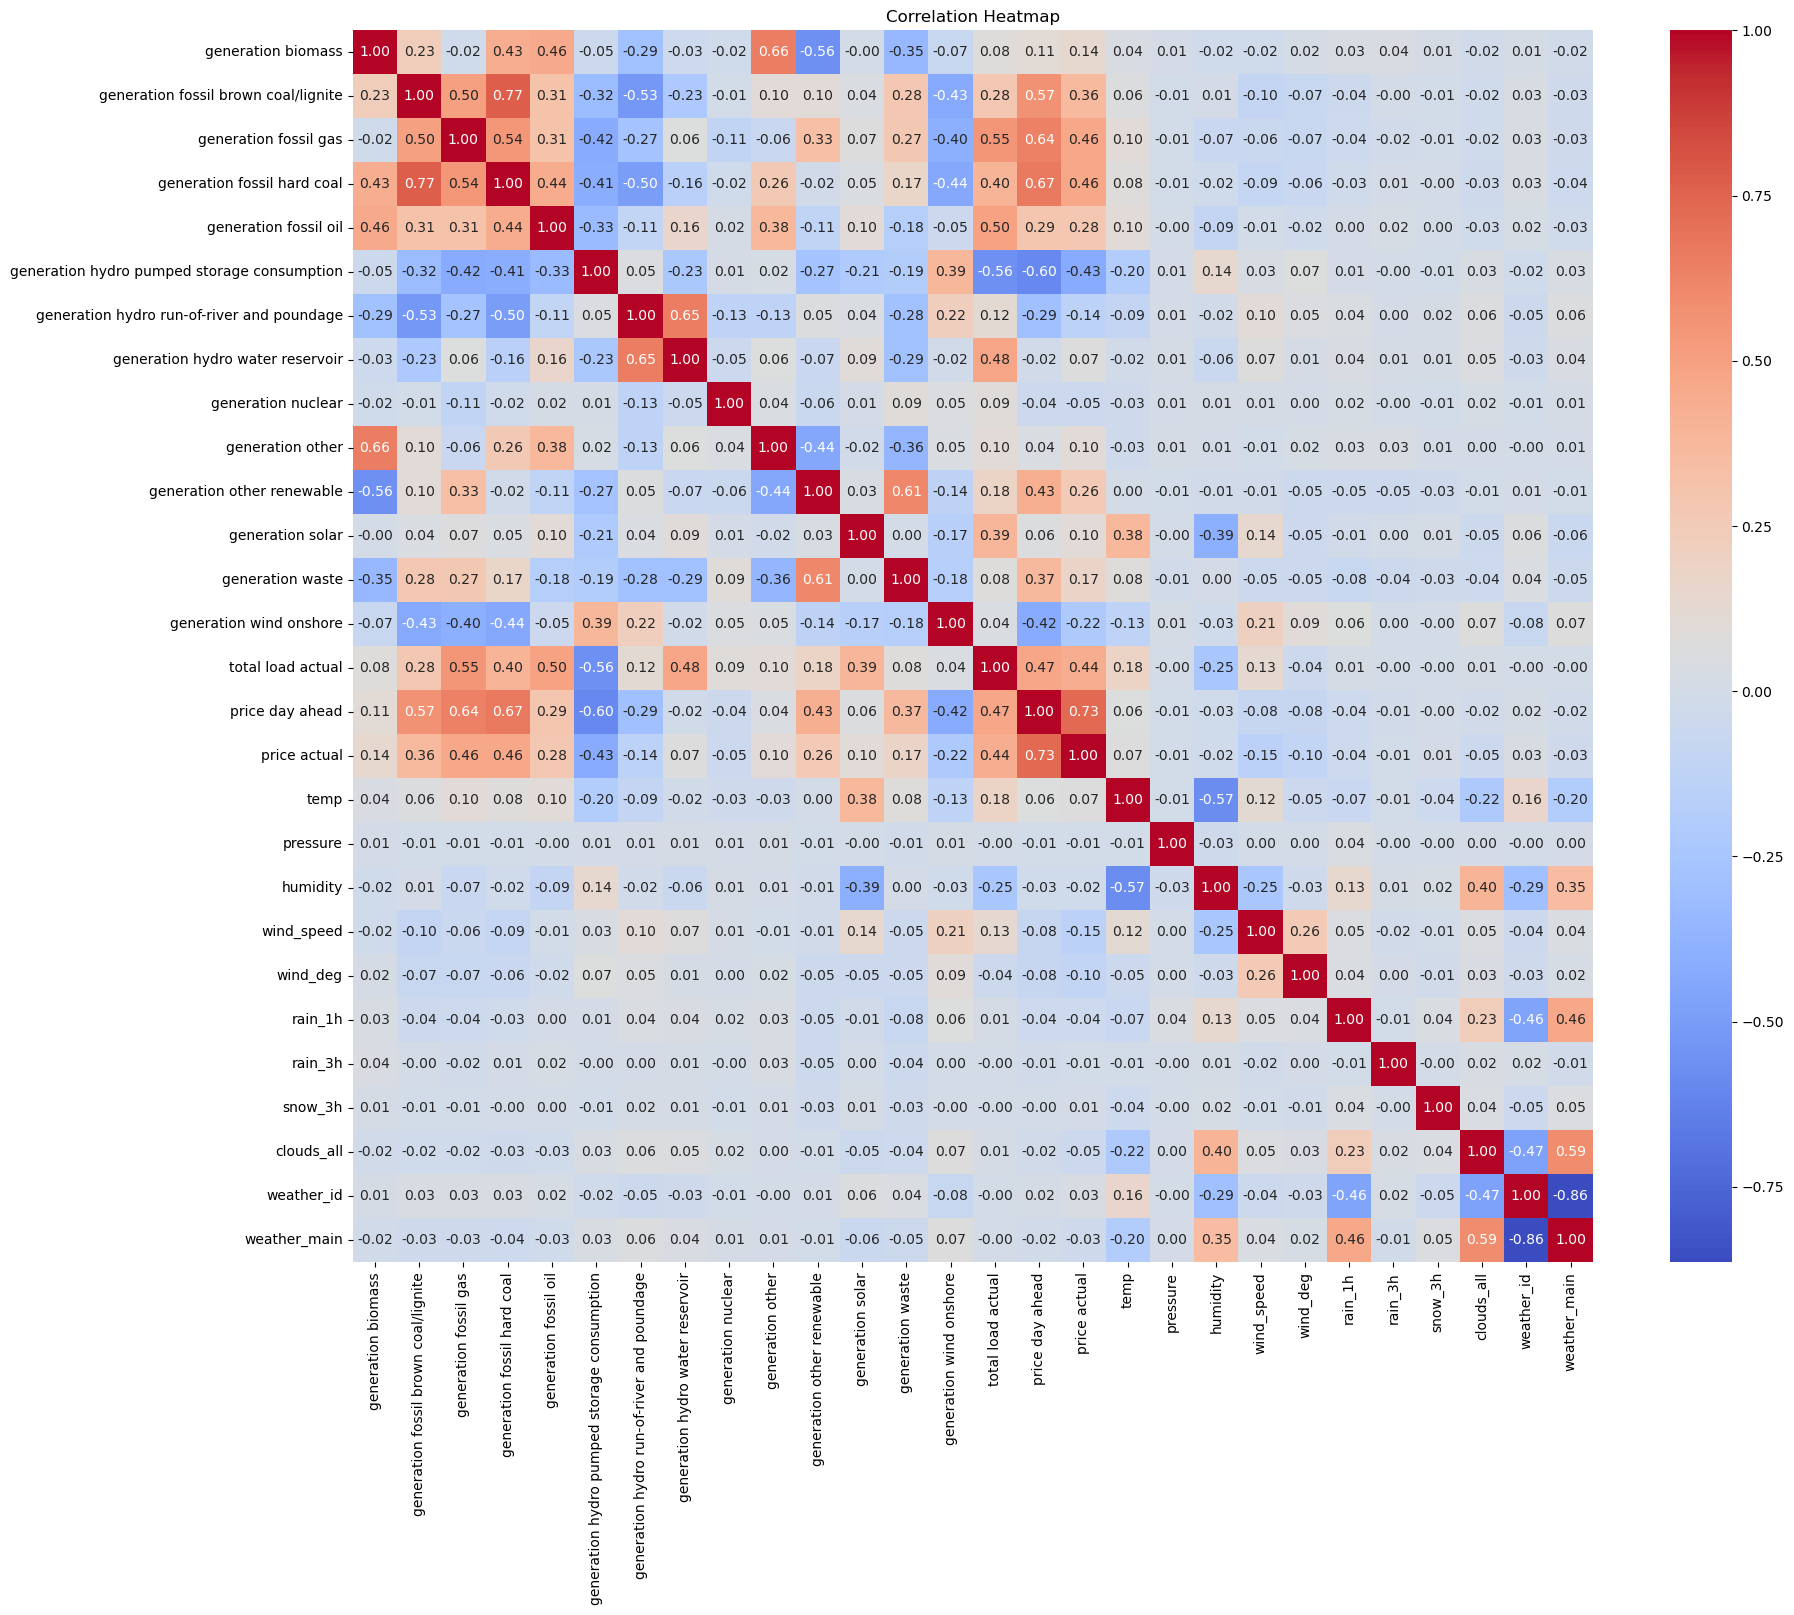

In [12]:
energy_corr = df_energy_weather.drop(columns=['time'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df_energy_weather.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'city_name', 'temp', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main'],
      dtype='object')

/tmp/ipykernel_7478/3129206018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_energy = energy_corr.corr()


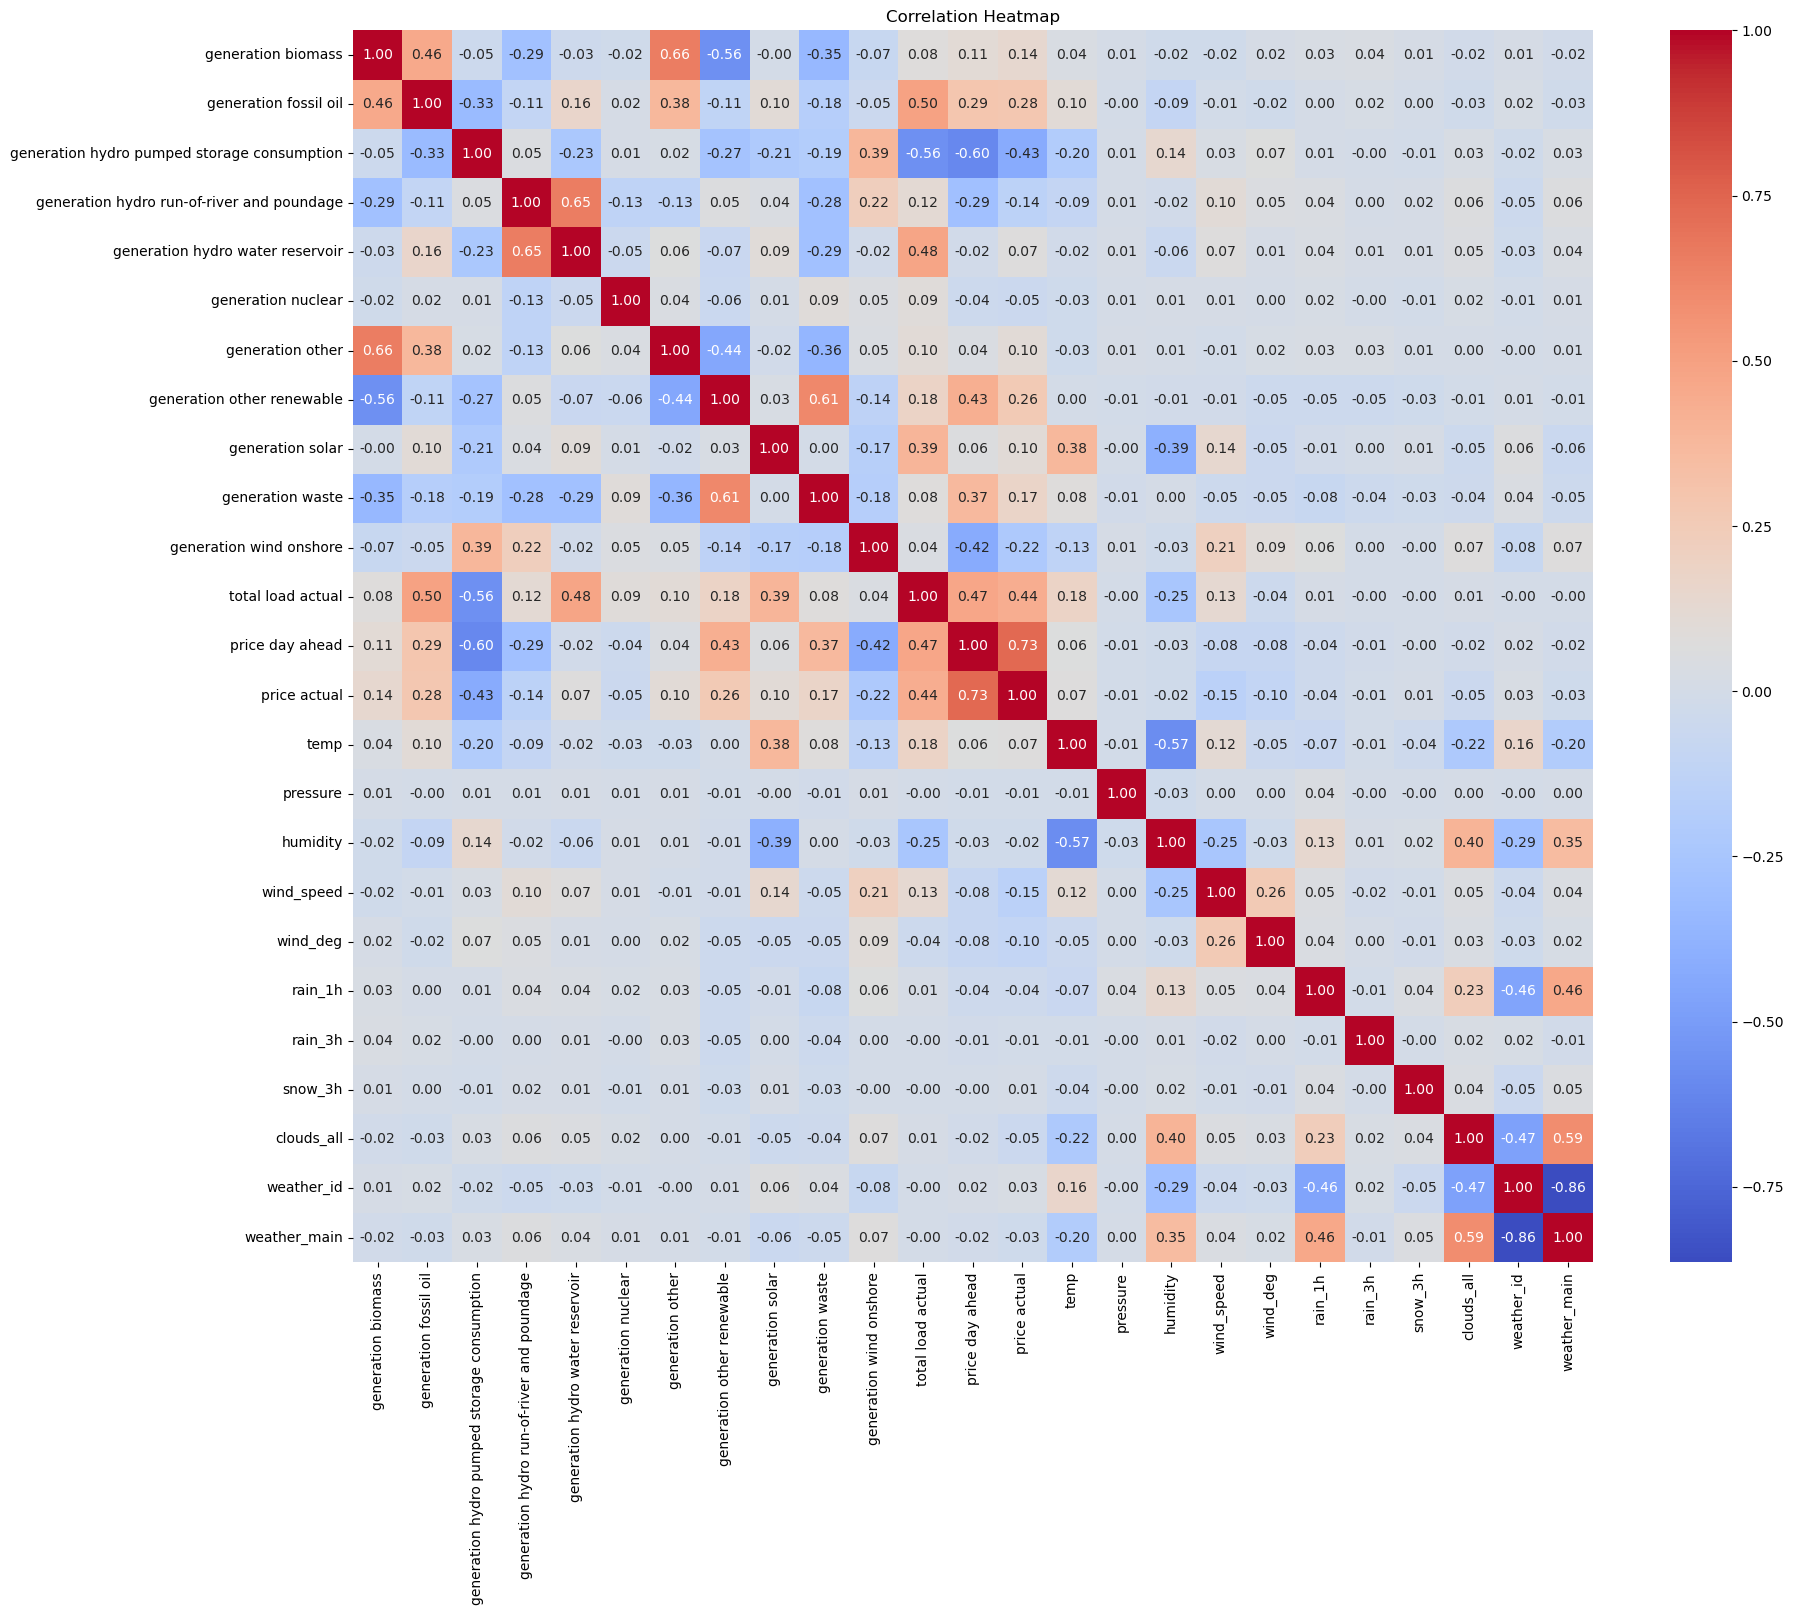

In [15]:
energy_corr = df_energy_weather.drop(columns=['time', 'generation fossil brown coal/lignite','generation fossil gas', 'generation fossil hard coal'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### PLOTS

In [17]:
df_energy_weather.head().T

,0,1,2,3,4
time,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00
generation biomass,447.0,447.0,447.0,447.0,447.0
generation fossil brown coal/lignite,329.0,329.0,329.0,329.0,329.0
generation fossil gas,4844.0,4844.0,4844.0,4844.0,4844.0
generation fossil hard coal,4821.0,4821.0,4821.0,4821.0,4821.0
generation fossil oil,162.0,162.0,162.0,162.0,162.0
generation hydro pumped storage consumption,863.0,863.0,863.0,863.0,863.0
generation hydro run-of-river and poundage,1051.0,1051.0,1051.0,1051.0,1051.0
generation hydro water reservoir,1899.0,1899.0,1899.0,1899.0,1899.0
generation nuclear,7096.0,7096.0,7096.0,7096.0,7096.0
